In [12]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [13]:
def calculate_spline(i,a,b,c,d,dx):
    return a[i] + b[i]*dx + (c[i]/2)*dx**2 + (d[i]/6)*dx**3

In [14]:
def three_diag_solver(a, b, c, d):
    n = len(b)
    p, q = np.zeros(n), np.zeros(n)
    c = np.append(c,0)
    x = np.zeros(n+1)
    p[0] = - c[0] / b[0]
    q[0] = d[0] / b[0]
    for i in range(0, n):
        p[i] = - c[i] / (b[i] + (a[i] * p[i]))
        q[i] = (d[i] - (a[i] * q[i])) / (b[i] + (a[i] * p[i]))
    x[n] = d[-1]
    for i in range(n - 1, 0):
        x[i] = (d[i] - a[i] * q[i])/(a[i] * p[i]+b[i])
    return x

In [15]:
def calculate_c(y,h,n):
    a = np.zeros(n-1); b = np.zeros(n-1); c = np.zeros(n-1); d = np.zeros(n-1)
    d[0] = 0; d[n-2] = 0
    b[0] = 1; b[n-2] = 1
    for i in range(1, n - 1):
        b[i] = 2 * (h[i] + h[i+1])
        a[i-1] = h[i]
        c[i-1] = h[i+1]
    for i in range(1, n-2):
        d[i] = 6 * ((y[i+1] - y[i]) / h[i+1] - (y[i] - y[i-1]) / h[i])
    c[0] = 0
    a[n-2] = 0
    c_ = three_diag_solver(a, b, c, d)
    return c_

In [16]:
def spline(x,y,point):
    h = np.diff(x); h = np.append(h, h[-1])
    n = len(x)
    b = np.zeros(n); d = np.zeros(n)
    a = y

    c = calculate_c(y,h,n)
    for i in range(n-1, 0, -1):
        d[i] = (c[i] - c[i-1]) / h[i]
        b[i] = h[i] * (2.0 * c[i] + c[i-1]) / 6.0 + (y[i] - y[i - 1]) / h[i]

    d[0] = c[0] / h[0]
    b[0] = (y[1] - y[0]) / h[1] + (h[1] * c[0] / 3)

    for i in range(n):
        if point <= x[i]:
            dx = point - x[i]
            return calculate_spline(i,a,b,c,d,dx)
    return calculate_spline(n-1,a,b,c,d,point - x[n-1])

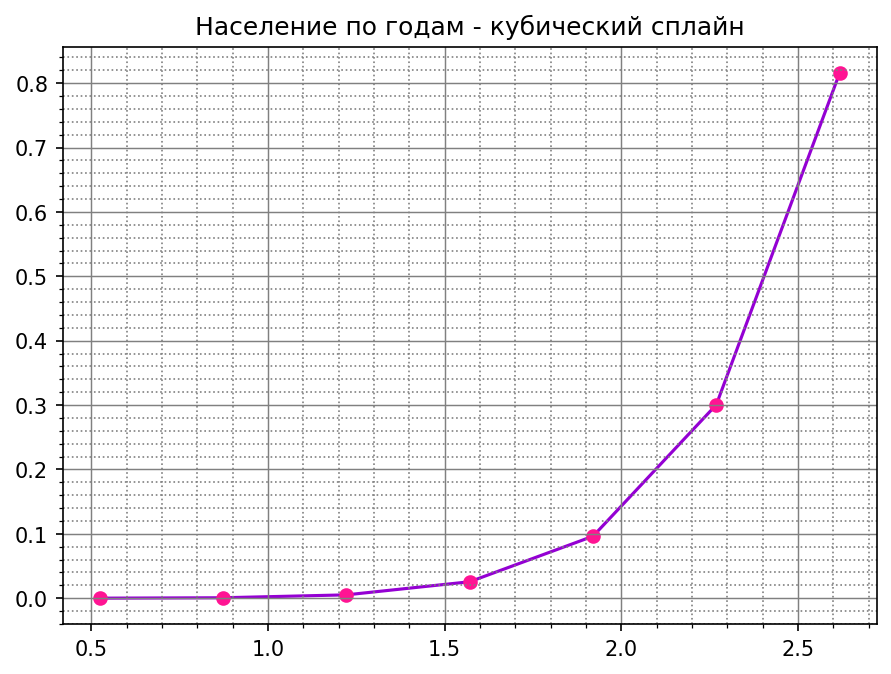

In [18]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
plt.title("Население по годам - кубический сплайн")
x = [0.52360,0.87267,1.22173,1.57080,1.91986,2.26893,2.61799]
y = [4*10**(-5),0.00068,0.00518,0.02554,0.09624,0.30046,0.81548]
plt.plot(x,[spline(x,y,i) for i in x],color = 'darkviolet', zorder = 0)
plt.scatter(x,y,color = 'deeppink')
plt.minorticks_on()
plt.grid(which='major',
        color = 'grey', 
        linewidth = 0.7)
plt.grid(which='minor', 
        color = 'grey', 
        linestyle = ':')
plt.show()

In [21]:
val = []
for i in x:
    val.append(spline(x,y,i))
print(val)

[4e-05, 0.00068, 0.00518, 0.02554, 0.09624, 0.30046, 0.81548]
